In [40]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


data = pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isnull().sum().sum()

0

In [30]:
nbElm=len(data['view'])
print("number of view: ",nbElm)


print(data['view'].value_counts())
print(data['grade'].value_counts())
print(data['yr_built'].value_counts())
print(data['price'].value_counts())


number of view:  21613
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64


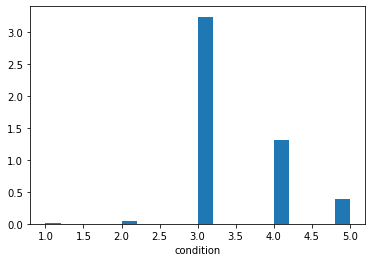

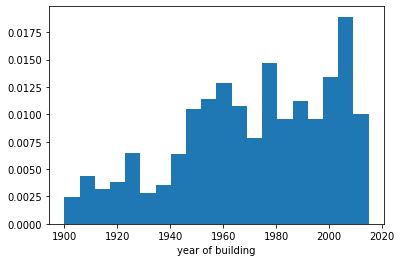

In [32]:
plt.hist(data['condition'],density=10, bins=20)
plt.xlabel('condition')
plt.show()

plt.hist(data['yr_built'],density=10, bins=20)
plt.xlabel('year of building')
plt.show()

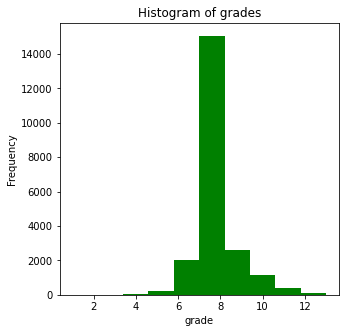

In [53]:
data['grade'].plot(kind='hist', figsize=(5, 5),color='green')

plt.title('Histogram of grades') 

plt.xlabel('grade') 
plt.show()

In [ ]:
data.hist(column='sqft_lot', by='price')

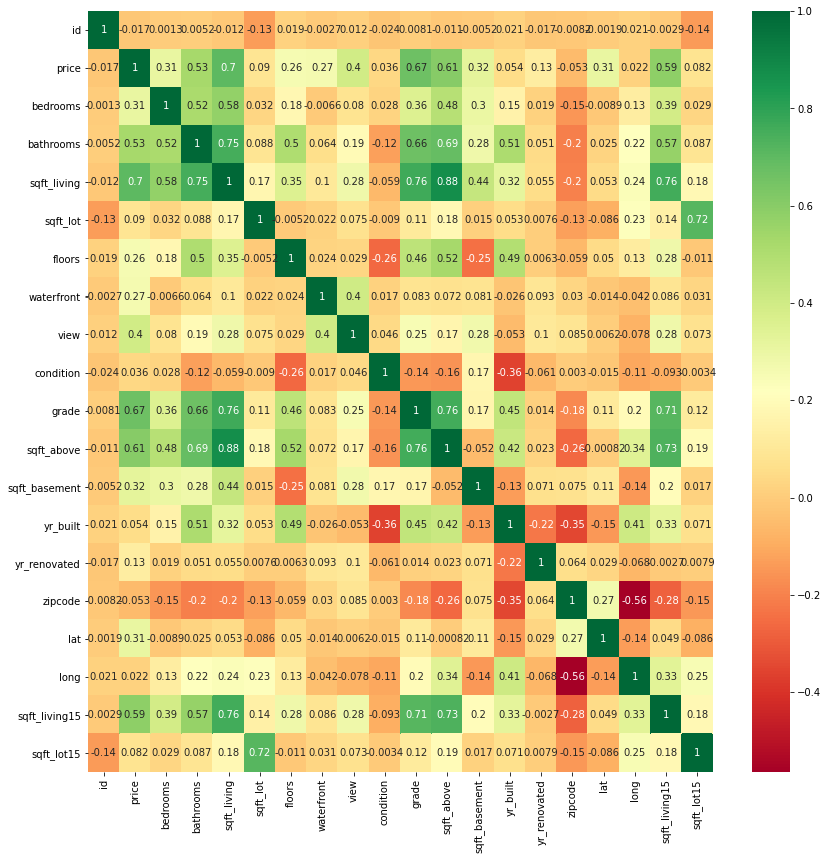

In [25]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,14))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

we choose Features With High Correlation:
-grade
-sqft_living
-sqft_above
-bathroom
-bedroom
-price
-sqft_living15

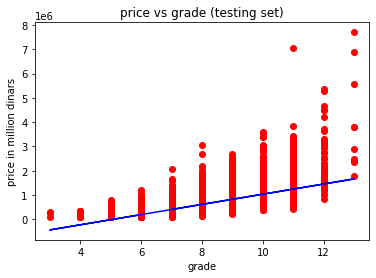

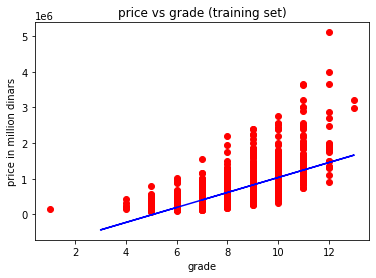

MSE 68533946794.312935
R squared 0.4552042311532961


In [50]:
#extract x and y from our data
x=data["grade"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)#splitting data with test size of 20%


reg= LinearRegression() #build linear regression model
reg.fit(x_train, y_train) #fitting the training data 
y_pred = reg.predict(x_test) #testing our model’s performance
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, reg.predict(x_train), color='blue')
plt.title('price vs grade (testing set)')
plt.xlabel('grade')
plt.ylabel('price in million dinars')
plt.show()

plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, reg.predict(x_train), color='blue')
plt.title('price vs grade (training set)')
plt.xlabel('grade')
plt.ylabel('price in million dinars')
plt.show()

print("MSE", mean_squared_error(y_test,y_pred))
print("R squared", metrics.r2_score(y_test,y_pred))


# => Nearly the half of the output variation can be explained by the model's inputs.

In [73]:
#extract x and y from our data
x=data[["grade","bedrooms"]]  #x have more than one input
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 67354609633.25702
R squared 0.4642385251265366


=> Nearly the same situation as the linear regression but a little bit farther

In [86]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

lg=LinearRegression() #build linear regression model
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_) #testing our model’s performance

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  380366004565.9882
R squared:  -2.0255605771840033


Polinomial regression has a negative result compared to the linear regression and the multi-linear regression.